In [1]:
### Imports des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

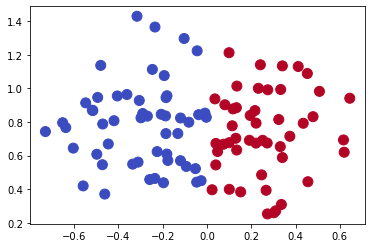

In [2]:
### Simulation de données en deux dimensions sur deux modes
np.random.seed(42)

# Distribution gaussienne sur deux dimensions
n_samples = 50

X = np.r_[
    0.25 * np.random.randn(n_samples, 2) + np.array([0.25, 0.75]),
    0.25 * np.random.randn(n_samples, 2) + np.array([-0.25, 0.75]),
]
y = X[:,0] > 0  

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'coolwarm', s = 100)

In [5]:
### Fonction permettant de visualiser les frontières de décisions

def plot_boundary(clf, X, y):
    h = 0.002
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, cmap = 'cool', alpha = 0.75)

    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'coolwarm', s = 100)
    #plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$X^1$')
    plt.ylabel('$X^2$')

C:  0.025 , kernel: linear, score d'entrainement:  0.52


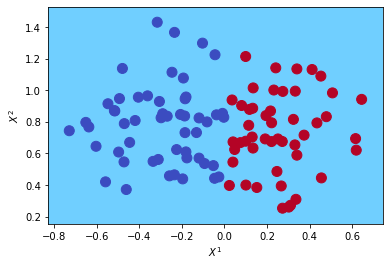

C:  0.05 , kernel: linear, score d'entrainement:  0.77


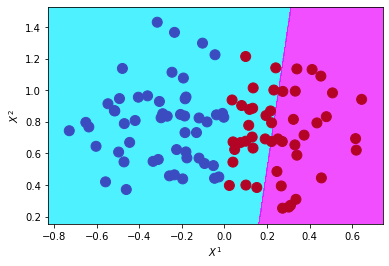

C:  0.075 , kernel: linear, score d'entrainement:  0.99


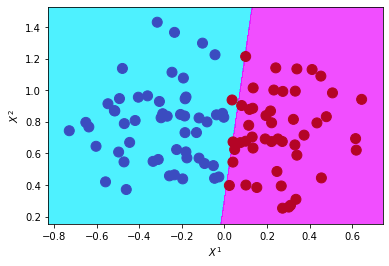

C:  1 , kernel: linear, score d'entrainement:  1.0


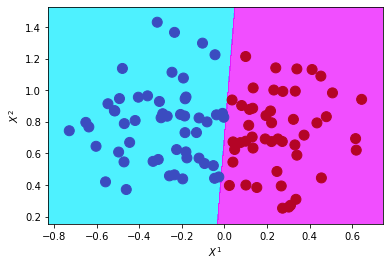

In [41]:
### Exemple de l'influence de C sur un classifieur linéaire

C_grid = [0.025, 0.05, 0.075, 1] 
        
for C_value in C_grid:
    clf = svm.SVC(C = C_value, kernel = 'linear')
    clf.fit(X, y)
    print("C: ", C_value, ", kernel: linear, score d'entrainement: ", clf.score(X, y))
    plot_boundary(clf, X, y)
    plt.show()

C: 1, kernel: RBF, gamma:  0.02 , score d'entrainement:  0.58


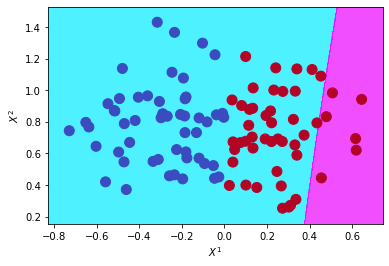

C: 1, kernel: RBF, gamma:  0.03 , score d'entrainement:  0.92


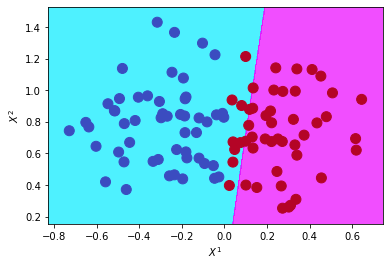

C: 1, kernel: RBF, gamma:  0.05 , score d'entrainement:  0.97


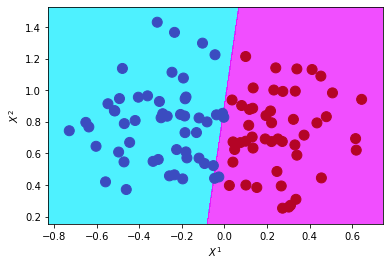

C: 1, kernel: RBF, gamma:  0.5 , score d'entrainement:  1.0


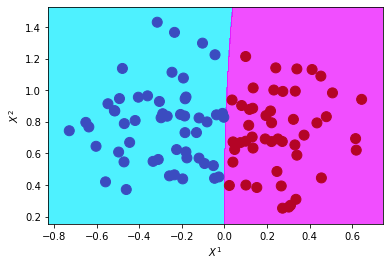

In [60]:
### Exemple de l'influence de gamma sur un noyau RBF

gamma_grid = [0.02, 0.03, 0.05, 0.5]#[0.05, 0.075, 0.08, 0.09, 0.1, 0.15]#np.logspace(-2, 1, 10)
        
for g_value in gamma_grid:
    clf = svm.SVC(C = 1, kernel = 'rbf', gamma = g_value)
    clf.fit(X, y)
    print("C: 1, kernel: RBF, gamma: ", g_value, ", score d'entrainement: ", clf.score(X, y))
    plot_boundary(clf, X, y)
    plt.show()

C: 0.025, kernel: poly, degree:  1 , score d'entrainement:  0.83


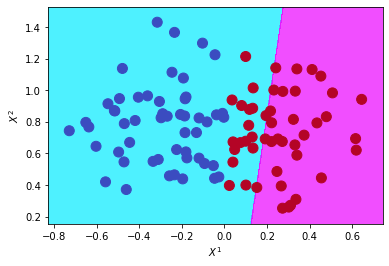

C: 0.025, kernel: poly, degree:  2 , score d'entrainement:  0.95


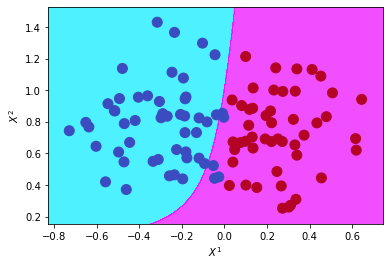

C: 0.025, kernel: poly, degree:  3 , score d'entrainement:  0.89


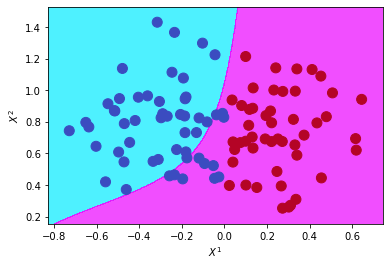

In [61]:
### Exemple de l'influence du degré sur un noyau polynomial

degree_grid = [1, 2, 3]#[0.05, 0.075, 0.08, 0.09, 0.1, 0.15]#np.logspace(-2, 1, 10)
        
for d_value in degree_grid:
    clf = svm.SVC(C = 0.025, kernel = 'poly', degree = d_value)
    clf.fit(X, y)
    print("C: 0.025, kernel: poly, degree: ", d_value, ", score d'entrainement: ", clf.score(X, y))
    plot_boundary(clf, X, y)
    plt.show()